# Basic Text Classification

In [1]:
#1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
import string
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# 2.Download and load the SMS Spam Collection Dataset 
dataset_url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
df = pd.read_csv(dataset_url, sep='\t', header=None, names=['label', 'text'])

df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Dataset shape: (5572, 2)

Class distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


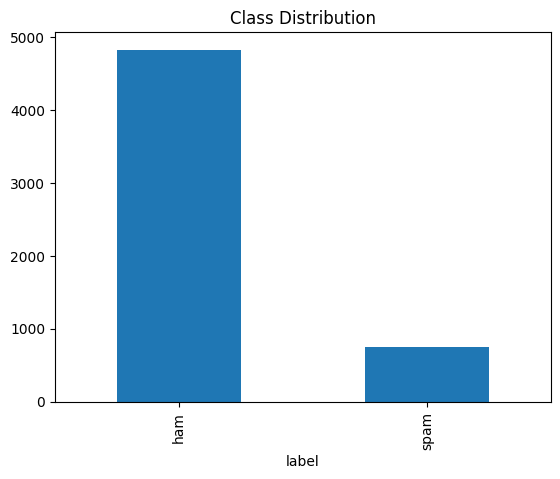

In [3]:
# Dataset shape and class distribution
print('Dataset shape:', df.shape)
print('\nClass distribution:')
print(df['label'].value_counts())
df['label'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()

In [4]:
#3. Text Cleaning (Lowercase, Remove Punctuation)
def clean_text(text):
    text = text.lower()
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()

,text,clean_text
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [5]:
# 4. Remove Stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    tokens = text.split()
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

df['clean_text_nostop'] = df['clean_text'].apply(remove_stopwords)
df[['clean_text', 'clean_text_nostop']].head()

,clean_text,clean_text_nostop
0,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni,ok lar joking wif u oni
2,free entry in a wkly comp to win fa cup final...,free entry wkly comp win fa cup final tkts st ...
3,u dun say so early hor u c already then say,u dun say early hor u c already say
4,nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though


In [6]:
# 5. Text Vectorization: CountVectorizer
count_vect = CountVectorizer()
X_count = count_vect.fit_transform(df['clean_text_nostop'])
print('CountVectorizer shape:', X_count.shape)

CountVectorizer shape: (5572, 8501)


In [7]:
# 6. Text Vectorization: TF-IDF
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(df['clean_text_nostop'])
print('TF-IDF shape:', X_tfidf.shape)

TF-IDF shape: (5572, 8501)


In [8]:
# 7. Train-Test Split
y = df['label']

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_count, y, test_size=0.2, random_state=42, stratify=y)
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

print('Train set size:', Xc_train.shape[0])
print('Test set size:', Xc_test.shape[0])

Train set size: 4457
Test set size: 1115


In [9]:
# 8. Model Training and Evaluation: Naive Bayes
nb_count = MultinomialNB()
nb_count.fit(Xc_train, yc_train)
yc_pred = nb_count.predict(Xc_test)

print('Naive Bayes (CountVectorizer)')
print('Accuracy:', accuracy_score(yc_test, yc_pred))
print('Confusion Matrix:\n', confusion_matrix(yc_test, yc_pred))
print('Classification Report:\n', classification_report(yc_test, yc_pred))

# Naive Bayes with TF-IDF
nb_tfidf = MultinomialNB()
nb_tfidf.fit(Xt_train, yt_train)
yt_pred = nb_tfidf.predict(Xt_test)

print('Naive Bayes (TF-IDF)')
print('Accuracy:', accuracy_score(yt_test, yt_pred))
print('Confusion Matrix:\n', confusion_matrix(yt_test, yt_pred))
print('Classification Report:\n', classification_report(yt_test, yt_pred))

Naive Bayes (CountVectorizer)
Accuracy: 0.9721973094170404
Confusion Matrix:
 [[946  20]
 [ 11 138]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.98      0.98       966
        spam       0.87      0.93      0.90       149

    accuracy                           0.97      1115
   macro avg       0.93      0.95      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Naive Bayes (TF-IDF)
Accuracy: 0.9632286995515695
Confusion Matrix:
 [[966   0]
 [ 41 108]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.72      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [10]:
# 9. Model Training and Evaluation: Logistic Regression
lr_count = LogisticRegression(max_iter=1000)
lr_count.fit(Xc_train, yc_train)
yc_pred_lr = lr_count.predict(Xc_test)

print('Logistic Regression (CountVectorizer)')
print('Accuracy:', accuracy_score(yc_test, yc_pred_lr))
print('Confusion Matrix:\n', confusion_matrix(yc_test, yc_pred_lr))
print('Classification Report:\n', classification_report(yc_test, yc_pred_lr))

# Logistic Regression with TF-IDF
lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(Xt_train, yt_train)
yt_pred_lr = lr_tfidf.predict(Xt_test)

print('Logistic Regression (TF-IDF)')
print('Accuracy:', accuracy_score(yt_test, yt_pred_lr))
print('Confusion Matrix:\n', confusion_matrix(yt_test, yt_pred_lr))
print('Classification Report:\n', classification_report(yt_test, yt_pred_lr))

Logistic Regression (CountVectorizer)
Accuracy: 0.9802690582959641
Confusion Matrix:
 [[966   0]
 [ 22 127]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Logistic Regression (TF-IDF)
Accuracy: 0.9587443946188341
Confusion Matrix:
 [[966   0]
 [ 46 103]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.95      1.00      0.98       966
        spam       1.00      0.69      0.82       149

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



In [11]:
# 10. Model Training and Evaluation: Support Vector Machine
svm_count = LinearSVC(max_iter=2000)
svm_count.fit(Xc_train, yc_train)
yc_pred_svm = svm_count.predict(Xc_test)

print('SVM (CountVectorizer)')
print('Accuracy:', accuracy_score(yc_test, yc_pred_svm))
print('Confusion Matrix:\n', confusion_matrix(yc_test, yc_pred_svm))
print('Classification Report:\n', classification_report(yc_test, yc_pred_svm))

# SVM with TF-IDF
svm_tfidf = LinearSVC(max_iter=2000)
svm_tfidf.fit(Xt_train, yt_train)
yt_pred_svm = svm_tfidf.predict(Xt_test)

print('SVM (TF-IDF)')
print('Accuracy:', accuracy_score(yt_test, yt_pred_svm))
print('Confusion Matrix:\n', confusion_matrix(yt_test, yt_pred_svm))
print('Classification Report:\n', classification_report(yt_test, yt_pred_svm))

SVM (CountVectorizer)
Accuracy: 0.9820627802690582
Confusion Matrix:
 [[964   2]
 [ 18 131]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.98      0.88      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

SVM (TF-IDF)
Accuracy: 0.979372197309417
Confusion Matrix:
 [[965   1]
 [ 22 127]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.99      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



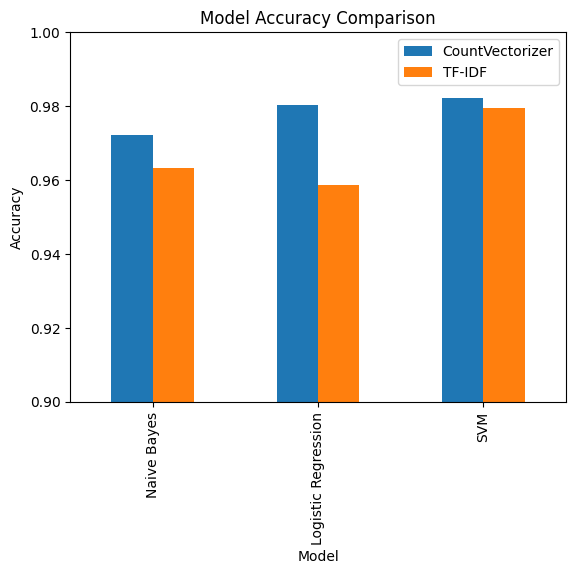

,Model,CountVectorizer,TF-IDF
0,Naive Bayes,0.972197,0.963229
1,Logistic Regression,0.980269,0.958744
2,SVM,0.982063,0.979372


In [12]:
#11. Compare CountVectorizer vs TF-IDF Results
results = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'SVM'],
    'CountVectorizer': [
        accuracy_score(yc_test, nb_count.predict(Xc_test)),
        accuracy_score(yc_test, lr_count.predict(Xc_test)),
        accuracy_score(yc_test, svm_count.predict(Xc_test))
    ],
    'TF-IDF': [
        accuracy_score(yt_test, nb_tfidf.predict(Xt_test)),
        accuracy_score(yt_test, lr_tfidf.predict(Xt_test)),
        accuracy_score(yt_test, svm_tfidf.predict(Xt_test))
    ]
})
results.set_index('Model').plot(kind='bar', ylim=(0.9,1.0), title='Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()
results

In [13]:
# 12. Show Top Important Words for Each Class
def show_top_words(model, vectorizer, n=10):
    feature_names = np.array(vectorizer.get_feature_names_out())
    if hasattr(model, 'coef_'):
        # Binary classification: show top positive and negative words
        coefs = model.coef_[0]
        top_positive = np.argsort(coefs)[-n:]
        top_negative = np.argsort(coefs)[:n]
        print("Top positive words:", feature_names[top_positive][::-1])
        print("Top negative words:", feature_names[top_negative])
    elif hasattr(model, 'feature_log_prob_'):
        for i, class_label in enumerate(model.classes_):
            top = np.argsort(model.feature_log_prob_[i])[-n:]
            print(f"Top words for class '{class_label}' (log prob):", feature_names[top][::-1])
            print()
print('Naive Bayes (CountVectorizer):')
show_top_words(nb_count, count_vect)
print('Logistic Regression (CountVectorizer):')
show_top_words(lr_count, count_vect)
print('Naive Bayes (TF-IDF):')
show_top_words(nb_tfidf, tfidf_vect)
print('Logistic Regression (TF-IDF):')
show_top_words(lr_tfidf, tfidf_vect)

Naive Bayes (CountVectorizer):
Top words for class 'ham' (log prob): ['im' 'get' 'ltgt' 'ok' 'dont' 'got' 'go' 'call' 'ill' 'know']

Top words for class 'spam' (log prob): ['call' 'free' 'txt' 'ur' 'claim' 'stop' 'text' 'mobile' 'reply' 'prize']

Logistic Regression (CountVectorizer):
Top positive words: ['txt' 'claim' 'service' 'chat' 'stop' 'text' 'call' 'ringtone' 'mobile'
 'reply']
Top negative words: ['ltgt' 'ill' 'sir' 'later' 'sorry' 'ok' 'hey' 'amp' 'way' 'cant']
Naive Bayes (TF-IDF):
Top words for class 'ham' (log prob): ['im' 'ok' 'ill' 'call' 'get' 'come' 'ltgt' 'got' 'sorry' 'dont']

Top words for class 'spam' (log prob): ['call' 'free' 'txt' 'claim' 'mobile' 'ur' 'stop' 'prize' 'text' 'reply']

Logistic Regression (TF-IDF):
Top positive words: ['txt' 'stop' 'claim' 'free' 'mobile' 'reply' 'text' 'call' 'service'
 'win']
Top negative words: ['im' 'ltgt' 'ill' 'ok' 'come' 'later' 'sir' 'home' 'sorry' 'da']
